In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [7]:
#random sumber seed
np.random.seed(119)

#set number of data points
npoints = 50

#set x
x = np.linspace(0,10.,npoints)

#set slope, y intercept, and scatter rms
m = 2.0
b = 1.0
sigma = 2.0

#generate y points
y = m*x + b + np.random.normal(scale=sigma,size=npoints)
y_err = np.full(npoints,sigma)

plot the data

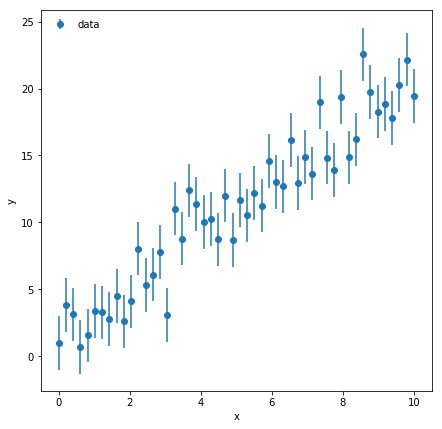

In [23]:
f = plt.figure(figsize=(7,7))
plt.errorbar(x,y,sigma,fmt='o',label = 'data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=2,frameon=False)

Method #1, polyfit()

m_fit, b_fit = np.poly1d(np.polyfit(x, y, 1, w=1./y_err)) #weight with uncertainties
print(m_fit, b_fit)

y_fit = m_fit * x + b_fit

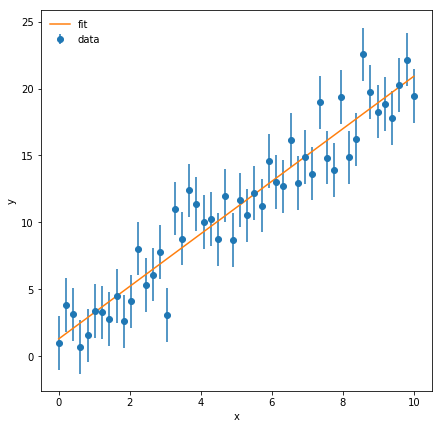

In [15]:
f = plt.figure(figsize=(7,7))
plt.errorbar(x,y,sigma,fmt='o', label='data')
plt.plot(x,y_fit,label='fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=2,frameon=False)

Method #2, scipy + optimize

In [16]:
#import optimize from scipy
from scipy import optimize

#define the function to fit
def f_line(x, m, b):
    return m*x + b

#perform the fit
params, params_cov = optimize.curve_fit(f_line,x,y,sigma=y_err)

m_fit = params[0]
bfit = params[1]
print(m_fit,b_fit)

1.9634043457508432 1.283010681296193


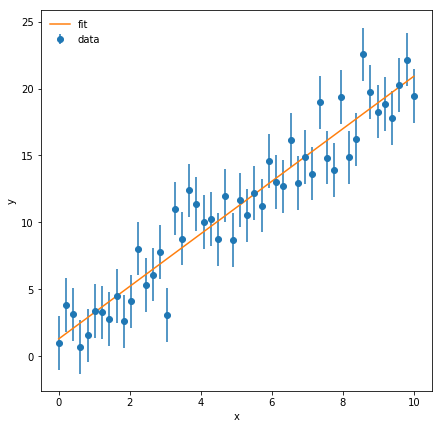

In [17]:
f = plt.figure(figsize=(7,7))
plt.errorbar(x,y,yerr=y_err,fmt='o', label='data')
plt.plot(x,y_fit,label='fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=2,frameon=False)

We can perform much more complicated fits...

Text(0, 0.5, 'y')

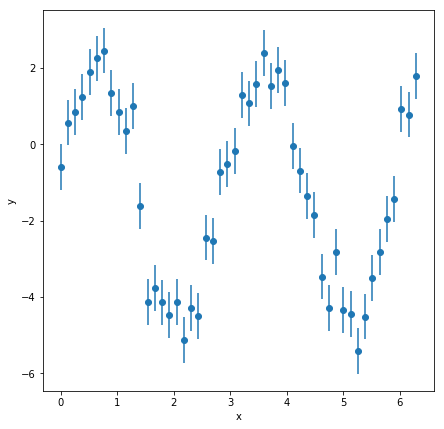

In [41]:
#redefine x and y 
npoints = 50
x = np.linspace(0.,2*np.pi,npoints)

#make y a complicated function
a = 3.4
b = 2.1
c = 0.27
d = -1.3
sig = 0.6

y = a * np.sin( b*x + c) + d + np.random.normal(scale=sig,size=npoints)
y_err = np.full(npoints,sig)

f = plt.figure(figsize=(7,7))
plt.errorbar(x,y,yerr=y_err,fmt='o')
plt.xlabel('x')
plt.ylabel('y')

Perform a fit using scipy.optimize.curve_fit()

In [28]:
#import optimize from scipy
from scipy import optimize

def f_line(x, a, b, c, d):
    return a * np.sin( b*x + c) + d

params, params_cov = optimize.curve_fit(f_line,x,y,sigma=y_err,p0=[1,2.,0.1,-0.1])

a_fit = params[0]
b_fit = params[1]
c_fit = params[2]
d_fit = params[3]

print(a_fit,b_fit,c_fit,d_fit)

y_fit = a_fit * np.sin(b_fit * x + c_fit) + d_fit

3.193131717681487 2.0667879427163123 0.36893153365621395 -1.2177796939167234


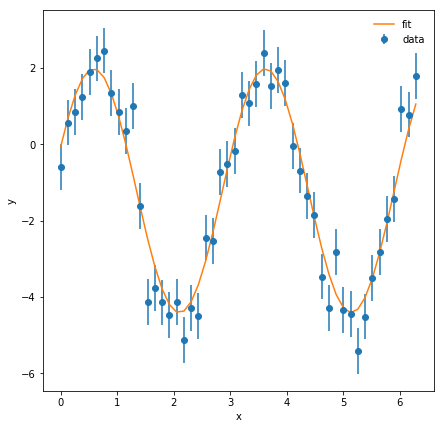

In [42]:
f = plt.figure(figsize=(7,7))
plt.errorbar(x,y,yerr=y_err,fmt='o',label='data')
plt.plot(x,y_fit,label='fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=0,frameon=False)